In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sets the maximum number of columns that will be displayed in a dataframe to 20 for improved data viewing
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

# using warnings module to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# load customer data present in CSV file
data1 = pd.read_csv("../data/Data1.csv")
data2 = pd.read_csv("../data/Data2.csv")

In [7]:
# shape and size of data
print(data1.shape)
print(data2.shape)

(5000, 8)
(5000, 7)


In [8]:
data1.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [9]:
data2.head()

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [10]:
# merging two data frames using pandas merge function based on customer id
cust_data = data1.merge(data2, how="inner", on="ID")

In [11]:
cust_data.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

In [12]:
# explore final shape of data
print(cust_data.shape)

(5000, 14)


In [13]:
# explore data types
cust_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

**Observation:**

All data attributes are quantitative data. So, we don't need data transformation here.

In [14]:
# data description
cust_data.describe().transpose()

count          mean          std     min       25%  \
ID                   5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                  5000.0     45.338400    11.463166    23.0     35.00   
CustomerSince        5000.0     20.104600    11.467954    -3.0     10.00   
HighestSpend         5000.0     73.774200    46.033729     8.0     39.00   
ZipCode              5000.0  93152.503000  2121.852197  9307.0  91911.00   
HiddenScore          5000.0      2.396400     1.147663     1.0      1.00   
MonthlyAverageSpend  5000.0      1.937938     1.747659     0.0      0.70   
Level                5000.0      1.881000     0.839869     1.0      1.00   
Mortgage             5000.0     56.498800   101.713802     0.0      0.00   
Security             5000.0      0.104400     0.305809     0.0      0.00   
FixedDepositAccount  5000.0      0.060400     0.238250     0.0      0.00   
InternetBanking      5000.0      0.596800     0.490589     0.0      0.00   
CreditCard           5000.0      0.294000     0.455637     0.0      0.00   
LoanOnCard           4980.0      0.096386     0.295149     0.0      0.00   

                         50%       75%      max  
ID                    2500.5   3750.25   5000.0  
Age                     45.0     55.00     67.0  
CustomerSince           20.0     30.00     43.0  
HighestSpend            64.0     98.00    224.0  
ZipCode              93437.0  94608.00  96651.0  
HiddenScore              2.0      3.00      4.0  
MonthlyAverageSpend      1.5      2.50     10.0  
Level                    2.0      3.00      3.0  
Mortgage                 0.0    101.00    635.0  
Security                 0.0      0.00      1.0  
FixedDepositAccount      0.0      0.00      1.0  
InternetBanking          1.0      1.00      1.0  
CreditCard               0.0      1.00      1.0  
LoanOnCard               0.0      0.00      1.0

In [15]:
# dropping ID as it doesn't have any impact on learning
cust_data = cust_data.drop(columns="ID")

In [16]:
cust_data.shape

(5000, 13)

In [17]:
# check for null values
cust_data.isnull().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

**Observation:**
* `LoanOnCard` attribute has 20 null data, which is 0.4% of the total number of records in the data.
* Again this attribute is the target class, hence we can't replace null values using mean or mode. We can remove these data from our dataset.

In [18]:
# drop rows having null values using pandas dropna function
cust_data = cust_data.dropna()

In [19]:
# explore size after null value removal
print(cust_data.shape)

(4980, 13)


## Exploratory Data Analysis

<Axes: xlabel='LoanOnCard', ylabel='count'>

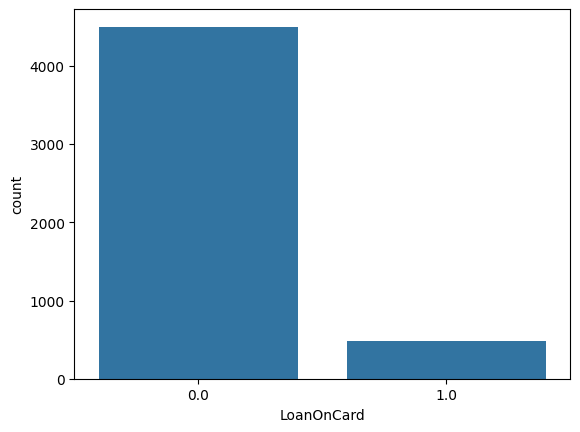

In [20]:
# let's explore how data is distributed as per target class
sns.countplot(x="LoanOnCard", data=cust_data)

**Observation:**

The plot shows that the data is highly imbalanced.

In [21]:
# exactly how many no. of samples have LoanOnCard is True & how many no. of samples have LoanOnCard is False
n_true = len(cust_data.loc[cust_data["LoanOnCard"] == 1.0])
n_false = len(cust_data.loc[cust_data["LoanOnCard"] == 0.0])

# calculate target class data %
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.64%)
Number of false cases: 4500 (90.36%)


[None]

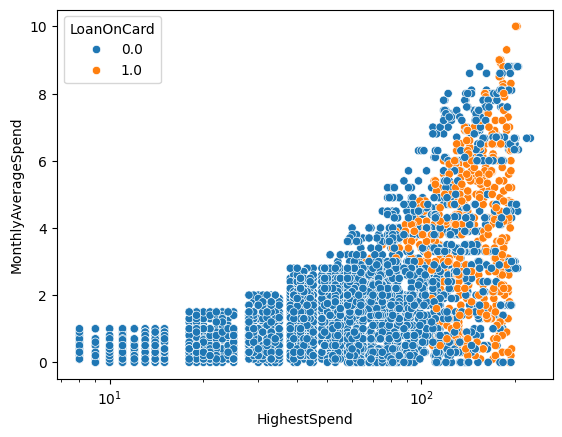

In [22]:
# scatter plot to see how data points are distributed for "MonthlyAverageSpend" and "HighestSpend" as per target class
g = sns.scatterplot(x="HighestSpend",
                    y="MonthlyAverageSpend",
                    hue="LoanOnCard",
                    data=cust_data,
                    legend="full")
g.set(xscale="log")

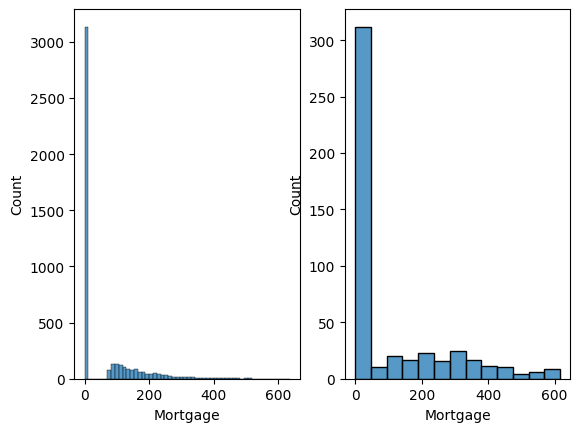

In [23]:
# histogram plot to see how the data points are distributed for "Mortgage" as per target class
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, "Mortgage"], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, "Mortgage"], ax = ax[1])
plt.show()

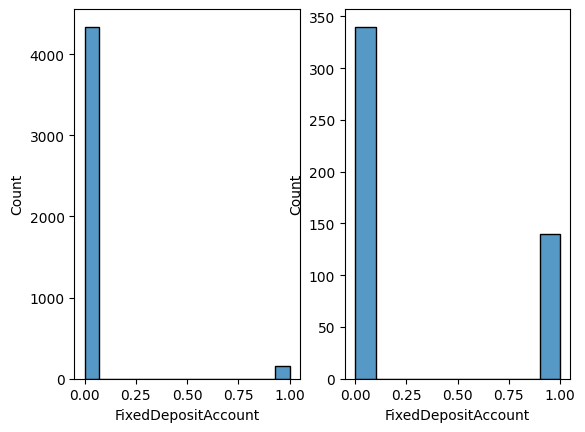

In [24]:
# histogram plot to see how the data points are distributed for "FixedDepositAccount" as per target class
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, "FixedDepositAccount"], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, "FixedDepositAccount"], ax = ax[1])
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'CustomerSince'}>],
       [<Axes: title={'center': 'HighestSpend'}>,
        <Axes: title={'center': 'ZipCode'}>],
       [<Axes: title={'center': 'HiddenScore'}>,
        <Axes: title={'center': 'MonthlyAverageSpend'}>],
       [<Axes: title={'center': 'Level'}>,
        <Axes: title={'center': 'Mortgage'}>],
       [<Axes: title={'center': 'Security'}>,
        <Axes: title={'center': 'FixedDepositAccount'}>],
       [<Axes: title={'center': 'InternetBanking'}>,
        <Axes: title={'center': 'CreditCard'}>],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

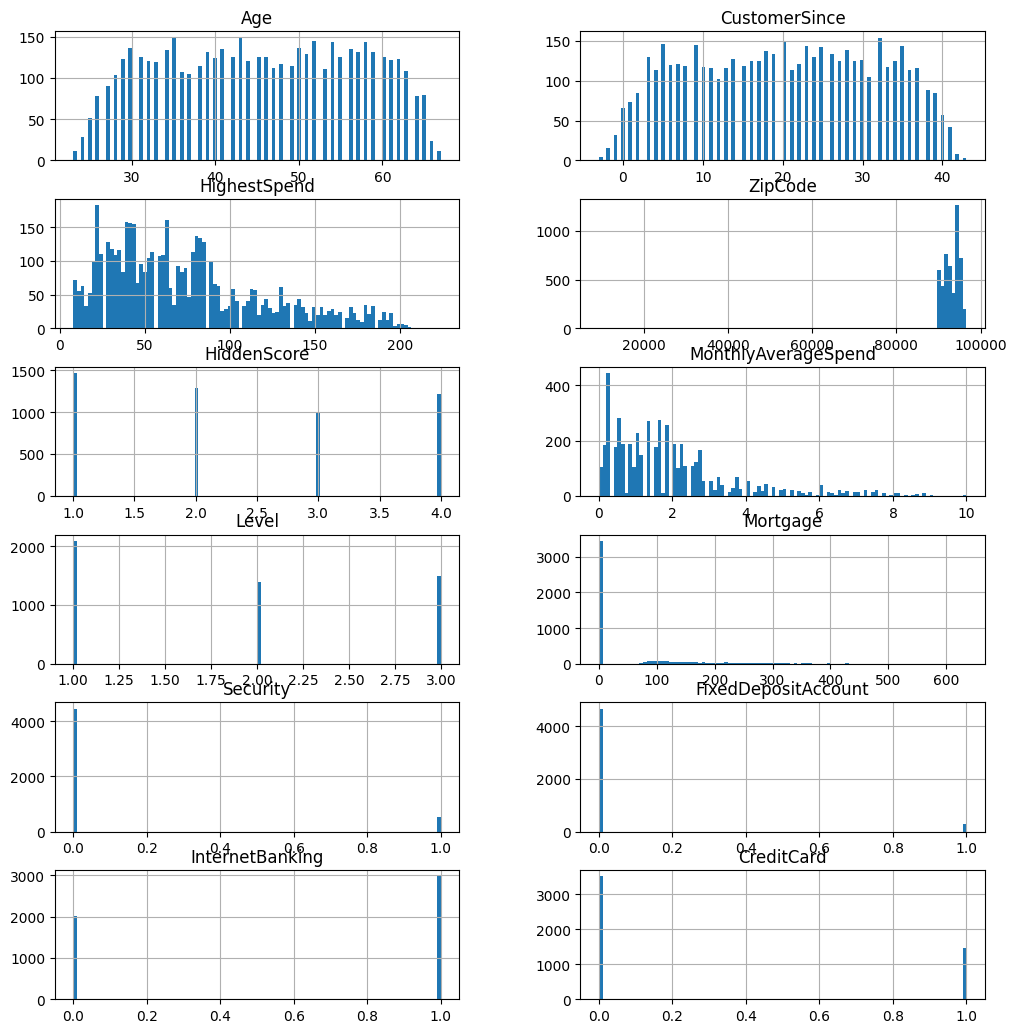

In [25]:
# let's plot the histogram plot for all the data
columns = list(cust_data)[0:-1] # excluding target column
cust_data[columns].hist(stacked=False, bins=100, figsize=(12, 30), layout=(14, 2))

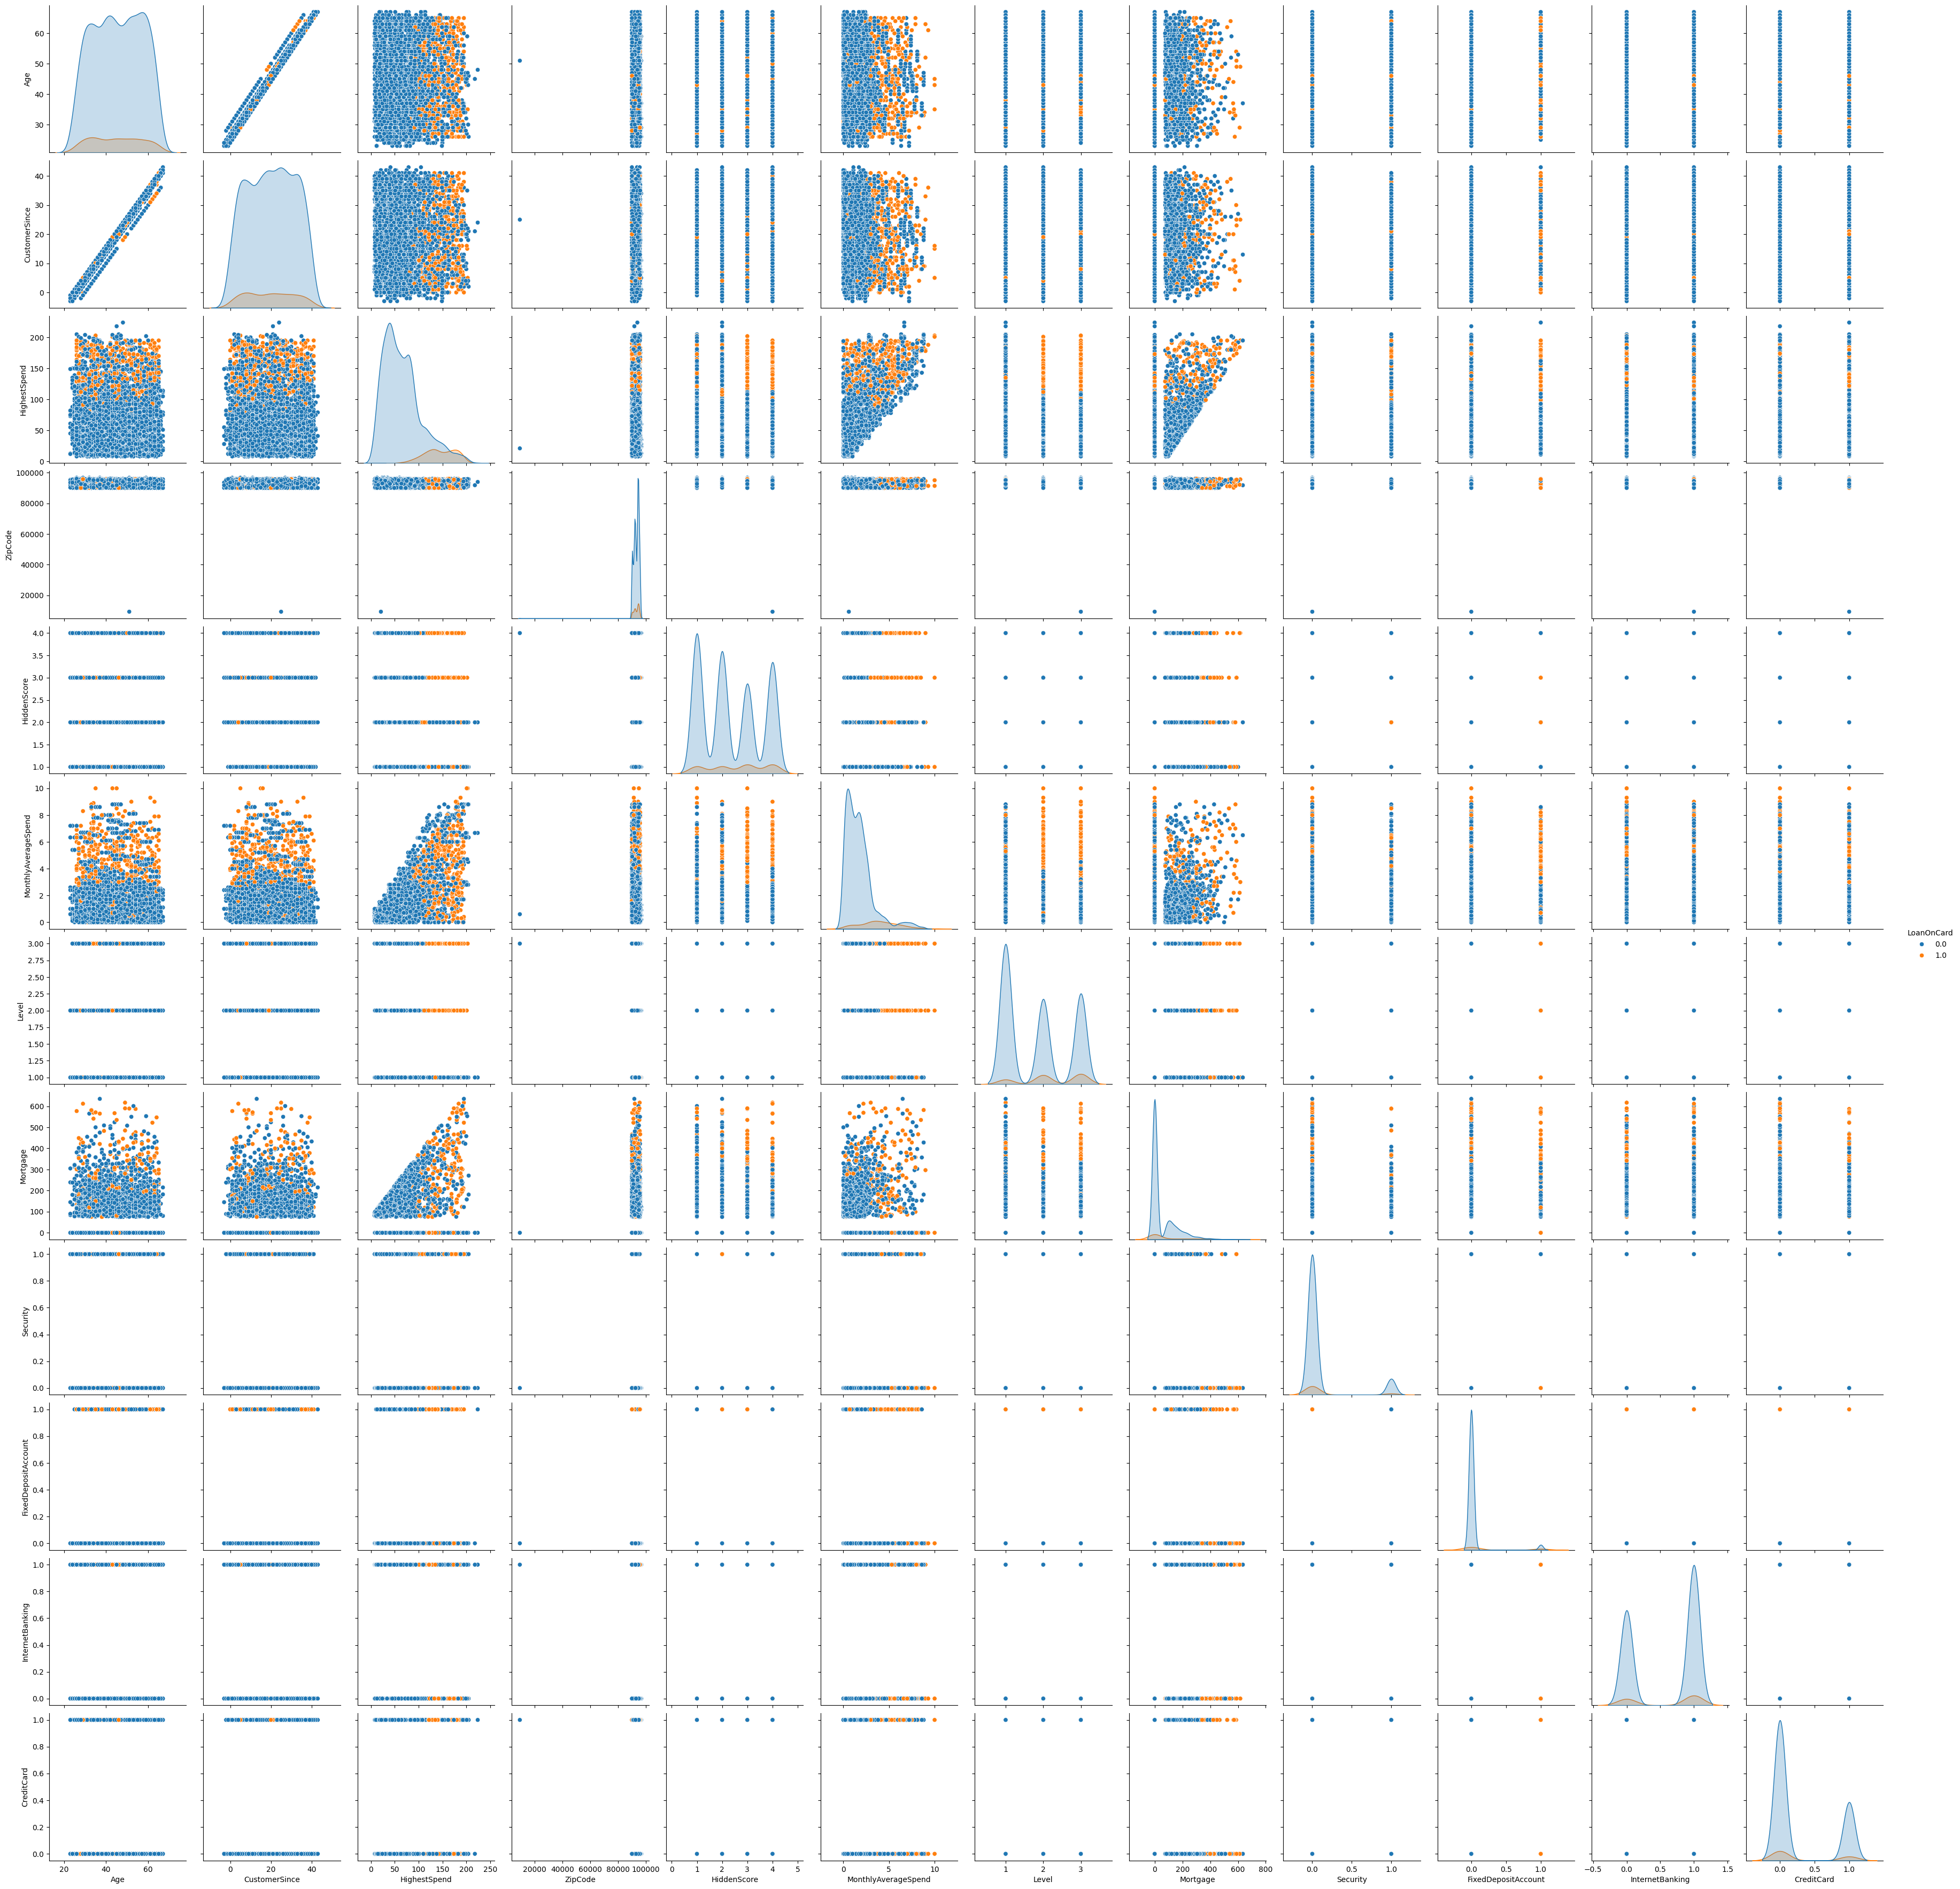

In [26]:
# let's plot pairplot to visualize relationship between different variables
sns.pairplot(cust_data, height=3, hue="LoanOnCard")

**Observation:**

* `ZipCode` doesn't have any significance with other independent variables and on learning, hence we can drop it from independent variable list.
* `Age` and `CustomerSince` have similar information content. We will verify through correlation analysis.

In [27]:
# dropping "ZipCode" column
cust_data = cust_data.drop(columns="ZipCode")

In [28]:
# correlation analysis
corr = cust_data.corr()
corr

Age  CustomerSince  HighestSpend  HiddenScore  \
Age                  1.000000       0.994208     -0.054951    -0.045289   
CustomerSince        0.994208       1.000000     -0.046092    -0.051456   
HighestSpend        -0.054951      -0.046092      1.000000    -0.158357   
HiddenScore         -0.045289      -0.051456     -0.158357     1.000000   
MonthlyAverageSpend -0.051896      -0.049918      0.646109    -0.109180   
Level                0.042750       0.014545     -0.188909     0.065762   
Mortgage            -0.013272      -0.011380      0.207236    -0.021396   
Security             0.000323      -0.000469     -0.002284     0.019061   
FixedDepositAccount  0.007744       0.010085      0.169535     0.014327   
InternetBanking      0.011227       0.011355      0.014202     0.010900   
CreditCard           0.007344       0.008779     -0.002780     0.010784   
LoanOnCard          -0.008147      -0.007801      0.502626     0.061761   

                     MonthlyAverageSpend     Level  Mortgage  Security  \
Age                            -0.051896  0.042750 -0.013272  0.000323   
CustomerSince                  -0.049918  0.014545 -0.011380 -0.000469   
HighestSpend                    0.646109 -0.188909  0.207236 -0.002284   
HiddenScore                    -0.109180  0.065762 -0.021396  0.019061   
MonthlyAverageSpend             1.000000 -0.137020  0.110275  0.015105   
Level                          -0.137020  1.000000 -0.032863 -0.009443   
Mortgage                        0.110275 -0.032863  1.000000 -0.005002   
Security                        0.015105 -0.009443 -0.005002  1.000000   
FixedDepositAccount             0.136410  0.013982  0.089167  0.317673   
InternetBanking                -0.003475 -0.014556 -0.007044  0.014007   
CreditCard                     -0.006577 -0.011766 -0.007600 -0.014518   
LoanOnCard                      0.366912  0.137010  0.141947  0.021982   

                     FixedDepositAccount  InternetBanking  CreditCard  \
Age                             0.007744         0.011227    0.007344   
CustomerSince                   0.010085         0.011355    0.008779   
HighestSpend                    0.169535         0.014202   -0.002780   
HiddenScore                     0.014327         0.010900    0.010784   
MonthlyAverageSpend             0.136410        -0.003475   -0.006577   
Level                           0.013982        -0.014556   -0.011766   
Mortgage                        0.089167        -0.007044   -0.007600   
Security                        0.317673         0.014007   -0.014518   
FixedDepositAccount             1.000000         0.176082    0.278924   
InternetBanking                 0.176082         1.000000    0.004960   
CreditCard                      0.278924         0.004960    1.000000   
LoanOnCard                      0.316131         0.006034    0.002536   

                     LoanOnCard  
Age                   -0.008147  
CustomerSince         -0.007801  
HighestSpend           0.502626  
HiddenScore            0.061761  
MonthlyAverageSpend    0.366912  
Level                  0.137010  
Mortgage               0.141947  
Security               0.021982  
FixedDepositAccount    0.316131  
InternetBanking        0.006034  
CreditCard             0.002536  
LoanOnCard             1.000000

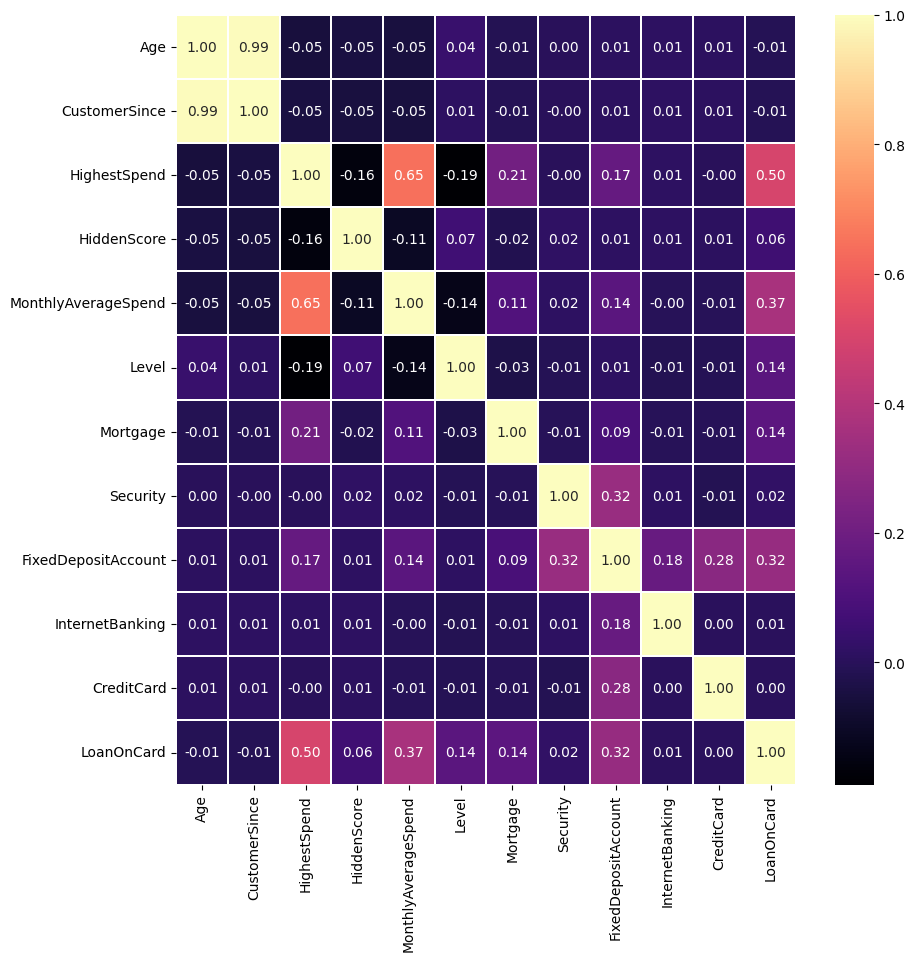

In [29]:
# heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cust_data.corr(),
            ax=ax,
            annot=True,
            linewidths=0.05,
            fmt=".2f",
            cmap="magma")
plt.show()

**Observation:**

As `Age` and `CustomerSince` are highly correlated, we can drop one. Let's drop "Age".

In [30]:
# drop "Age" column
cust_data = cust_data.drop(columns="Age")

In [31]:
print(cust_data.shape)

(4980, 11)


In [32]:
cust_data.head()

CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  \
9               9           180            1                  8.9      3   
10             39           105            4                  2.4      3   
11              5            45            3                  0.1      2   
12             23           114            2                  3.8      3   
13             32            40            4                  2.5      2   

    Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
9          0         0                    0                0           0   
10         0         0                    0                0           0   
11         0         0                    0                1           0   
12         0         1                    0                0           0   
13         0         0                    0                1           0   

    LoanOnCard  
9          1.0  
10         0.0  
11         0.0  
12         0.0  
13         0.0

## Spliting the data

70% of data for training and 30% for testing

In [33]:
from sklearn.model_selection import train_test_split

X = cust_data.drop("LoanOnCard", axis=1)
y = cust_data["LoanOnCard"] # predicted class (1=True, 0=False)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
x_train.head()

CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  \
276               5            22            4                  0.5      3   
4279             15            80            2                  1.8      2   
1678             30            73            2                  1.1      1   
1171             40            43            1                  1.9      2   
2302             17           155            1                  7.0      1   

      Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  
276        109         0                    0                1           0  
4279        86         0                    0                1           1  
1678         0         0                    0                0           0  
1171         0         0                    0                1           0  
2302         0         0                    0                0           1

## Logistic Regression

In [35]:
# build logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# fit the model on train data
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

# predict on test data
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df["intercept"] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.003153  0.04306  0.471174  0.110629  1.217251 -0.000035 -0.487734   

          7         8         9  intercept  
0  3.033793 -0.755025 -0.881916 -10.043728  


In [36]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9451137884872824


In [37]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_test, y_predict)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_predict)}")
print(f"Recall Score: {recall_score(y_test, y_predict)}")
print(f"Precision Score: {precision_score(y_test, y_predict)}")
print(f"f1 score: {f1_score(y_test, y_predict)}")

Accuracy Score: 0.9451137884872824
Confusion Matrix: 
[[1325   25]
 [  57   87]]
Area Under Curve: 0.7928240740740741
Recall Score: 0.6041666666666666
Precision Score: 0.7767857142857143
f1 score: 0.6796875


**Observation:**

For minority class, the above model is able to predict 57 correctly, out of 144. Although the accuracy is high, still the model is not a good model. We need to handle the imbalanced data.

## Weighted Logistic Regression to handle class imbalance

We know that the number of 0 (False) class is close to 9 times the number of 1 (True) class (from the countplot of Target variable). The number of class 1 (True) is 9.64%, whereas the number of class 0 (False) is 90.36%.

In [38]:
# let's put the class weight of 0 as 1 & the class weight of 1 as 2
w = {0:1, 1:2}

# fit the model on train data
model_weighted = LogisticRegression(solver="liblinear", class_weight=w)
model_weighted.fit(x_train, y_train)

# predict on test data
y_predict = model_weighted.predict(x_test)

In [39]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_test, y_predict)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_predict)}")
print(f"Recall Score: {recall_score(y_test, y_predict)}")
print(f"Precision Score: {precision_score(y_test, y_predict)}")
print(f"f1 score: {f1_score(y_test, y_predict)}")

Accuracy Score: 0.9357429718875502
Confusion Matrix: 
[[1299   51]
 [  45   99]]
Area Under Curve: 0.8248611111111112
Recall Score: 0.6875
Precision Score: 0.66
f1 score: 0.673469387755102


## Naive Bayes Classifier

In [40]:
# build Naive Bayes model
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
diab_model = GaussianNB()

# fit the model on train data
diab_model.fit(x_train, y_train)

GaussianNB()

In [41]:
# model performance with training data
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy on training data: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))

Model Accuracy on training data: 0.8867


In [42]:
# model performance with test data
y_predict = diab_model.predict(x_test)
print("Model Accuracy on test data: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict)))

Model Accuracy on test data: 0.8708


In [43]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_test, y_predict)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_predict)}")
print(f"Recall Score: {recall_score(y_test, y_predict)}")

Accuracy Score: 0.8708165997322623
Confusion Matrix: 
[[1215  135]
 [  58   86]]
Area Under Curve: 0.7486111111111112
Recall Score: 0.5972222222222222


### Use of class prior for imbalanced data

In [44]:
diab_model_cp = GaussianNB(priors=[0.1, 0.9])
diab_model_cp.fit(x_train, y_train.ravel())
y_predict = diab_model_cp.predict(x_test)

In [45]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_test, y_predict)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_predict)}")
print(f"Recall Score: {recall_score(y_test, y_predict)}")

Accuracy Score: 0.7971887550200804
Confusion Matrix: 
[[1059  291]
 [  12  132]]
Area Under Curve: 0.8505555555555555
Recall Score: 0.9166666666666666


## Support Vector Machine Classifier

In [46]:
# build SVM model
from sklearn import svm
clf = svm.SVC(gamma=0.25, C=10)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

In [47]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_test, y_predict)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_predict)}")
print(f"Recall Score: {recall_score(y_test, y_predict)}")
print(f"Precision Score: {precision_score(y_test, y_predict)}")
print(f"f1 score: {f1_score(y_test, y_predict)}")

Accuracy Score: 0.9049531459170014
Confusion Matrix: 
[[1347    3]
 [ 139    5]]
Area Under Curve: 0.5162500000000001
Recall Score: 0.034722222222222224
Precision Score: 0.625
f1 score: 0.06578947368421052


**Observation:**

The accuracy is good. The confusion matrix shows that the decision boundary is very poor, basically the model didn't learn anything. Everything basically it is saying as 1 class. It is classifying negative class as negative & majority of the positive class are classified as negative. So, the recall score is very less & overall f1-score is also less.

The model is not able to learn anything. Because, we have not transformed or scaled our data. The impact of this is quite heavy on the support vector's weights. That is the reason why the SVM is not able to learn.

In [48]:
# scaling the data
from scipy.stats import zscore
XScaled = X.apply(zscore) # convert all attributes to Z scale
XScaled.describe()

CustomerSince  HighestSpend   HiddenScore  MonthlyAverageSpend  \
count   4.980000e+03  4.980000e+03  4.980000e+03         4.980000e+03   
mean   -7.918699e-17 -8.418077e-17 -3.210283e-17         1.212774e-16   
std     1.000100e+00  1.000100e+00  1.000100e+00         1.000100e+00   
min    -2.015918e+00 -1.429540e+00 -1.216634e+00        -1.108414e+00   
25%    -8.822859e-01 -7.565844e-01 -1.216634e+00        -7.083749e-01   
50%    -1.026117e-02 -2.138784e-01 -3.448588e-01        -2.511878e-01   
75%     8.617636e-01  5.242016e-01  5.269162e-01         3.345832e-01   
max     1.995396e+00  3.259439e+00  1.398691e+00         4.606425e+00   

              Level      Mortgage      Security  FixedDepositAccount  \
count  4.980000e+03  4.980000e+03  4.980000e+03         4.980000e+03   
mean   6.563246e-17  2.853585e-17  5.992529e-17        -2.639566e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00         1.000100e+00   
min   -1.048644e+00 -5.557467e-01 -3.414556e-01        -2.540817e-01   
25%   -1.048644e+00 -5.557467e-01 -3.414556e-01        -2.540817e-01   
50%    1.417474e-01 -5.557467e-01 -3.414556e-01        -2.540817e-01   
75%    1.332139e+00  4.361362e-01 -3.414556e-01        -2.540817e-01   
max    1.332139e+00  5.680349e+00  2.928638e+00         3.935742e+00   

       InternetBanking    CreditCard  
count     4.980000e+03  4.980000e+03  
mean      6.705925e-17 -9.060133e-17  
std       1.000100e+00  1.000100e+00  
min      -1.217601e+00 -6.459012e-01  
25%      -1.217601e+00 -6.459012e-01  
50%       8.212871e-01 -6.459012e-01  
75%       8.212871e-01  1.548224e+00  
max       8.212871e-01  1.548224e+00

In [49]:
x_trains, x_tests, y_trains, y_tests = train_test_split(XScaled, y, test_size=0.3, random_state=42)

In [50]:
clf = svm.SVC(gamma=0.25, C=10)
clf.fit(x_trains, y_trains)
y_predicts = clf.predict(x_tests)

In [51]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_tests, y_predicts)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_tests, y_predicts)}")
print(f"Area Under Curve: {roc_auc_score(y_tests, y_predicts)}")
print(f"Recall Score: {recall_score(y_tests, y_predicts)}")
print(f"Precision Score: {precision_score(y_tests, y_predicts)}")
print(f"f1 score: {f1_score(y_tests, y_predicts)}")

Accuracy Score: 0.9712182061579652
Confusion Matrix: 
[[1333   17]
 [  26  118]]
Area Under Curve: 0.903425925925926
Recall Score: 0.8194444444444444
Precision Score: 0.8740740740740741
f1 score: 0.8458781362007168


**Observation:**

The accuracy score is now 97%. From confusion matrix it can be seen that Class 0 & 1 are learned quite well. The f1-score is also descent.

In [52]:
# let's experiment with small values of gamma & c
clf = svm.SVC(gamma=0.1, C=0.1)
clf.fit(x_trains, y_trains)
y_predicts = clf.predict(x_tests)

In [53]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_tests, y_predicts)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_tests, y_predicts)}")
print(f"Area Under Curve: {roc_auc_score(y_tests, y_predicts)}")
print(f"Recall Score: {recall_score(y_tests, y_predicts)}")
print(f"Precision Score: {precision_score(y_tests, y_predicts)}")
print(f"f1 score: {f1_score(y_tests, y_predicts)}")

Accuracy Score: 0.9464524765729585
Confusion Matrix: 
[[1347    3]
 [  77   67]]
Area Under Curve: 0.7315277777777777
Recall Score: 0.4652777777777778
Precision Score: 0.9571428571428572
f1 score: 0.6261682242990654


**Observation:**

Here, the model is not at all learned, because mostly it is classifying everything as the negative class than the positive class.

In [54]:
# let's increase the values of c
clf = svm.SVC(gamma=0.1, C=1)
clf.fit(x_trains, y_trains)
y_predicts = clf.predict(x_tests)

In [55]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_tests, y_predicts)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_tests, y_predicts)}")
print(f"Area Under Curve: {roc_auc_score(y_tests, y_predicts)}")
print(f"Recall Score: {recall_score(y_tests, y_predicts)}")
print(f"Precision Score: {precision_score(y_tests, y_predicts)}")
print(f"f1 score: {f1_score(y_tests, y_predicts)}")

Accuracy Score: 0.9732262382864793
Confusion Matrix: 
[[1342    8]
 [  32  112]]
Area Under Curve: 0.8859259259259259
Recall Score: 0.7777777777777778
Precision Score: 0.9333333333333333
f1 score: 0.8484848484848485


**Observation:**

Now the recall value is improved and the performance of the model is quite better.

In [56]:
# let's increase the values of c to 10
clf = svm.SVC(gamma=0.1, C=10)
clf.fit(x_trains, y_trains)
y_predicts = clf.predict(x_tests)

In [57]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_tests, y_predicts)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_tests, y_predicts)}")
print(f"Area Under Curve: {roc_auc_score(y_tests, y_predicts)}")
print(f"Recall Score: {recall_score(y_tests, y_predicts)}")
print(f"Precision Score: {precision_score(y_tests, y_predicts)}")
print(f"f1 score: {f1_score(y_tests, y_predicts)}")

Accuracy Score: 0.9705488621151271
Confusion Matrix: 
[[1329   21]
 [  23  121]]
Area Under Curve: 0.9123611111111111
Recall Score: 0.8402777777777778
Precision Score: 0.852112676056338
f1 score: 0.8461538461538461


**Observation:**

The model is performing better with better recall score.

In [58]:
# let's increase the values of gamma to 0.25
clf = svm.SVC(gamma=0.25, C=10)
clf.fit(x_trains, y_trains)
y_predicts = clf.predict(x_tests)

In [59]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_tests, y_predicts)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_tests, y_predicts)}")
print(f"Area Under Curve: {roc_auc_score(y_tests, y_predicts)}")
print(f"Recall Score: {recall_score(y_tests, y_predicts)}")
print(f"Precision Score: {precision_score(y_tests, y_predicts)}")
print(f"f1 score: {f1_score(y_tests, y_predicts)}")

Accuracy Score: 0.9712182061579652
Confusion Matrix: 
[[1333   17]
 [  26  118]]
Area Under Curve: 0.903425925925926
Recall Score: 0.8194444444444444
Precision Score: 0.8740740740740741
f1 score: 0.8458781362007168


**Observation:**

The model is performing little better.

## Decision Tree Classifier

In [60]:
# build decision tree model
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion="gini", random_state=42)

# fit the model
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
# model scoring
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.9785809906291834


In [62]:
# model prediction on test data
y_predict = dTree.predict(x_test)

In [63]:
# model performance
print(f"Accurcay Score: {accuracy_score(y_test, y_predict)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_predict)}")
print(f"Recall Score: {recall_score(y_test, y_predict)}")
print(f"Precision Score: {precision_score(y_test, y_predict)}")
print(f"f1 score: {f1_score(y_test, y_predict)}")

Accurcay Score: 0.9785809906291834
Confusion Matrix: 
[[1331   19]
 [  13  131]]
Area Under Curve: 0.9478240740740741
Recall Score: 0.9097222222222222
Precision Score: 0.8733333333333333
f1 score: 0.891156462585034


In [64]:
# Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9896729776247849
0.9832663989290495


In [65]:
y_predictR = dTreeR.predict(x_test)

In [66]:
print(f"Accuracy Score: {accuracy_score(y_test, y_predictR)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_predictR)}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_predictR)}")
print(f"Recall Score: {recall_score(y_test, y_predictR)}")
print(f"Precision Score: {precision_score(y_test, y_predictR)}")
print(f"f1 score: {f1_score(y_test, y_predictR)}")

Accuracy Score: 0.9832663989290495
Confusion Matrix: 
[[1340   10]
 [  15  129]]
Area Under Curve: 0.944212962962963
Recall Score: 0.8958333333333334
Precision Score: 0.9280575539568345
f1 score: 0.911660777385159


**Observation:**

There is a slight improvement in the Accuracy, Precision Score & f1 score.

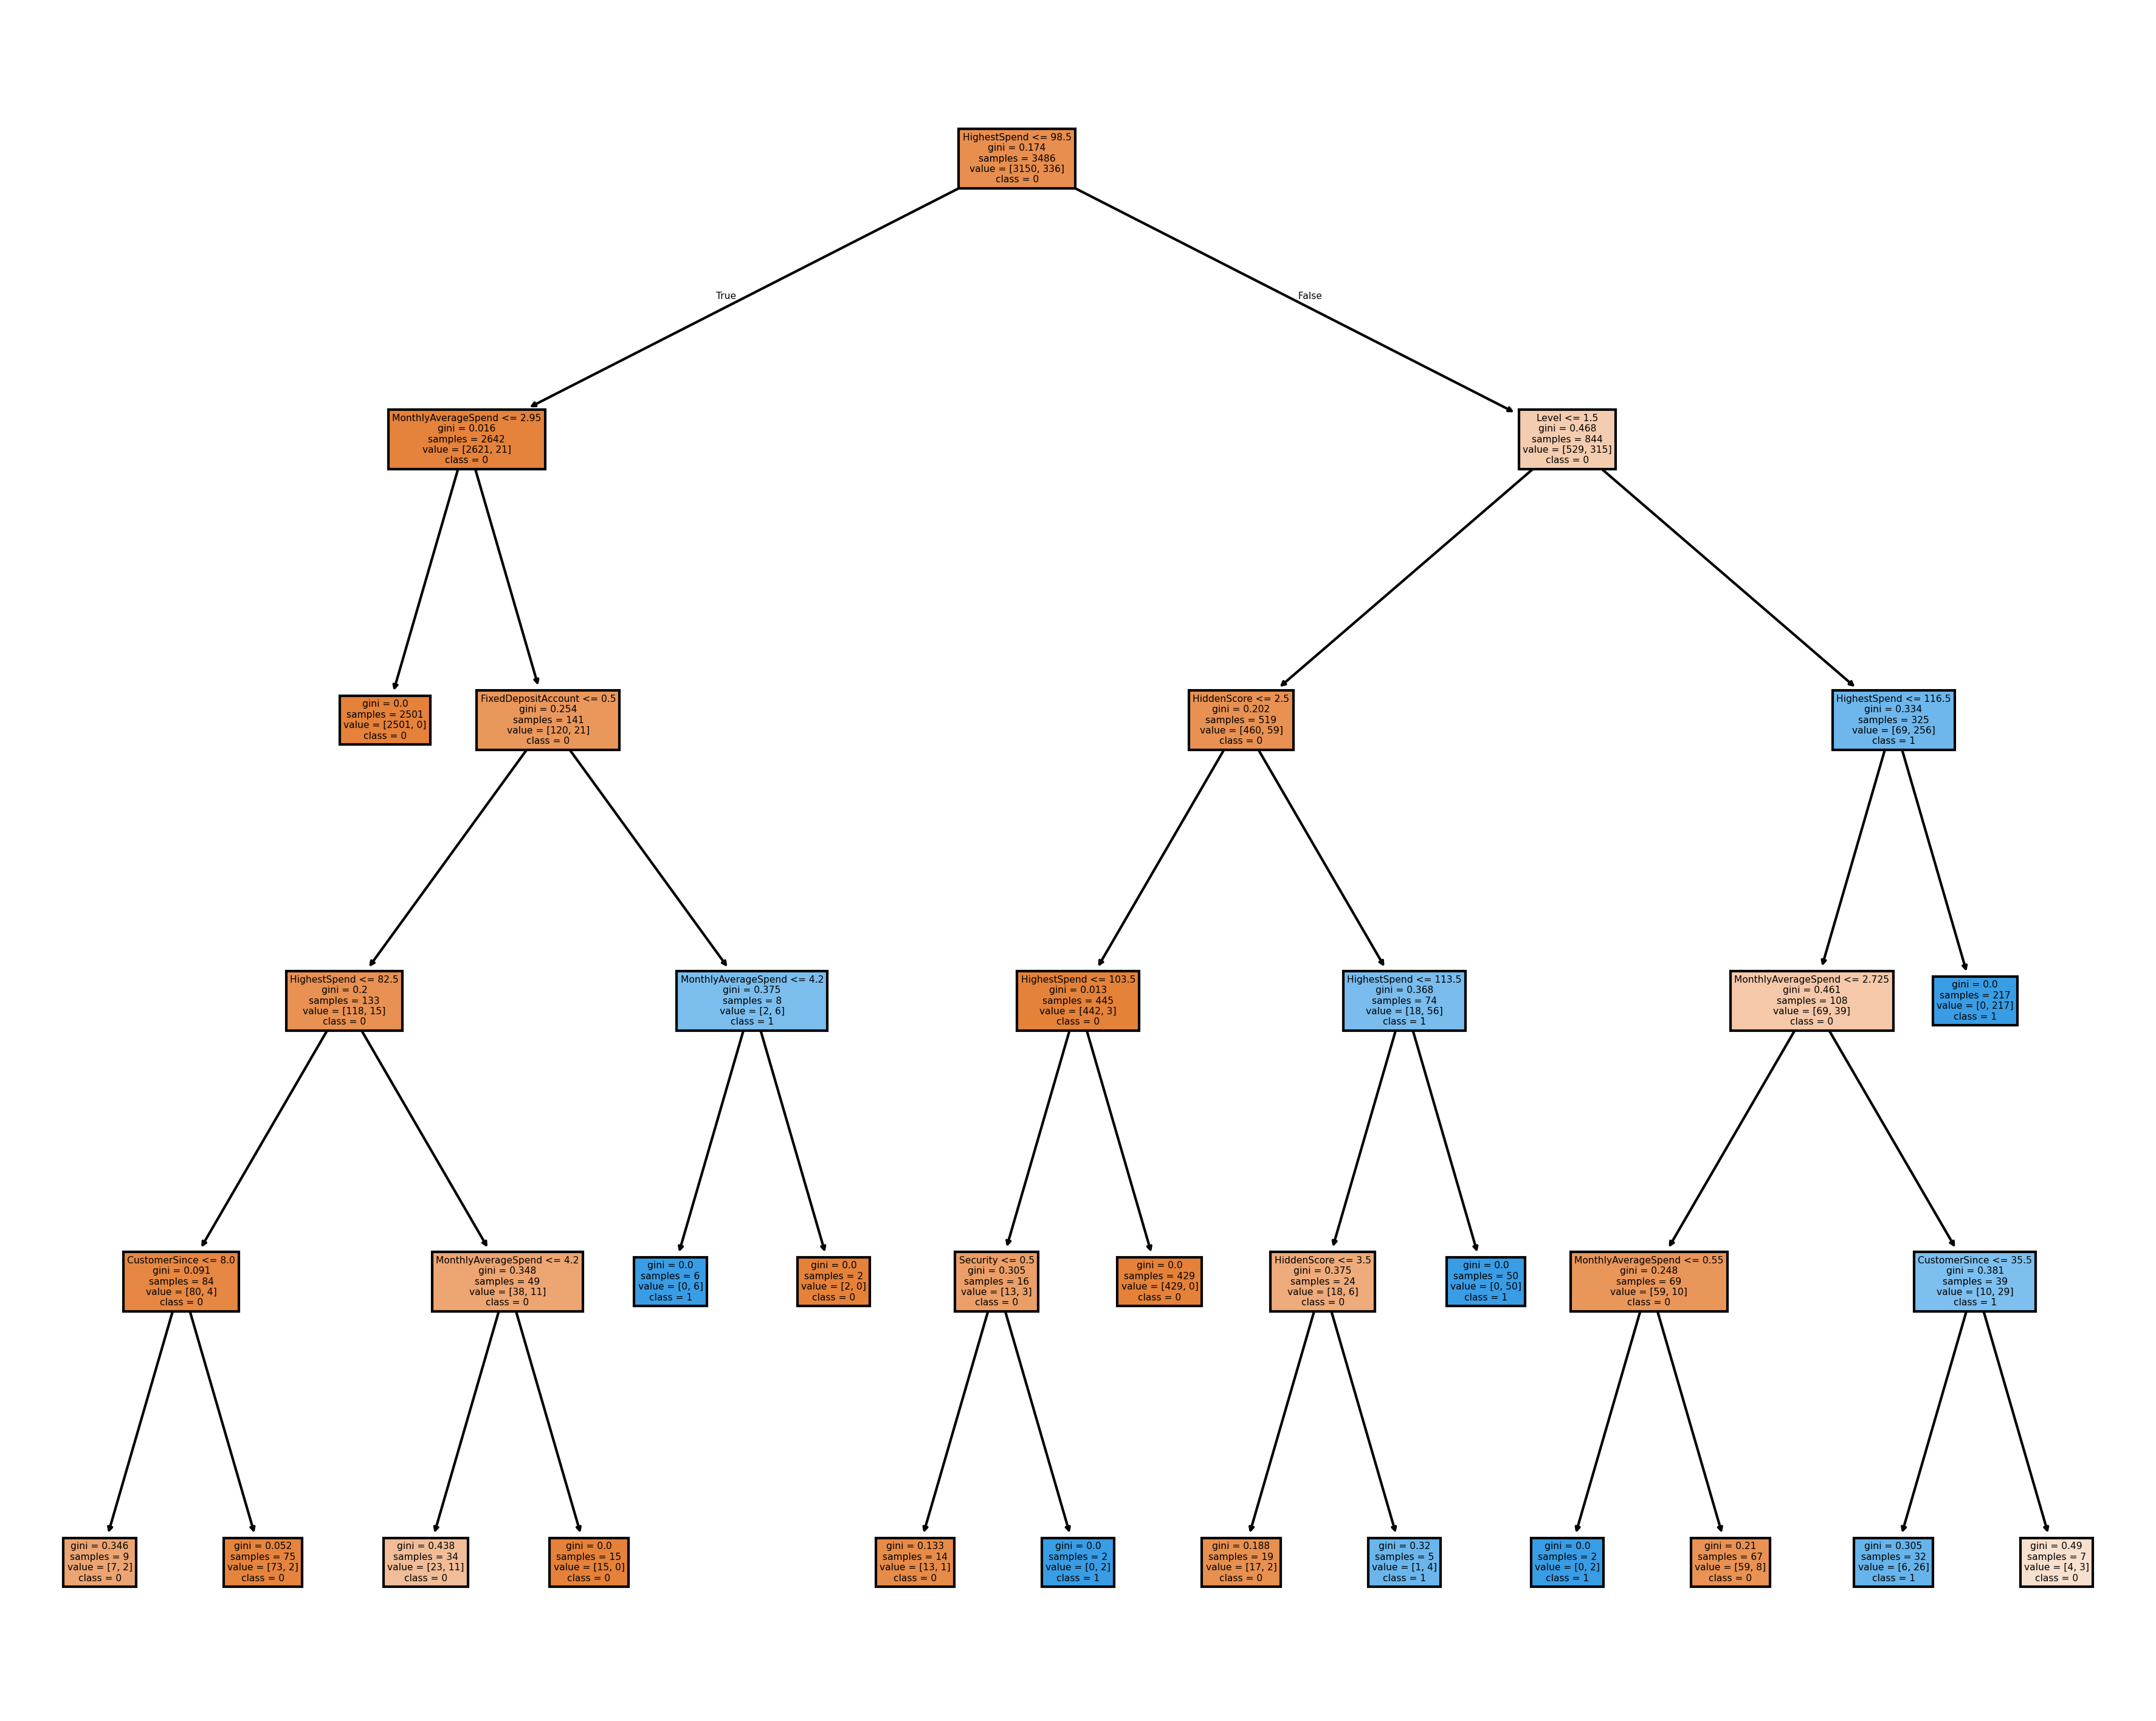

In [80]:
# visualize decision tree
from sklearn.tree import plot_tree

# list of feature names
fn = list(x_train)
# list of class names
cn = ["0", "1"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 12), dpi=300)
plot_tree(dTreeR, feature_names=fn, class_names=cn, filled=True)

fig.savefig("../images/tree.png")

## Random Forest Classifier

In [68]:
# build random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(random_state=42)

# fit the model
rfcl.fit(x_train, y_train)

# predict on the test data
y_predict = rfcl.predict(x_test)

In [69]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_test, y_predict)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_predict)}")
print(f"Recall Score: {recall_score(y_test, y_predict)}")
print(f"Precision Score: {precision_score(y_test, y_predict)}")
print(f"f1 Score: {f1_score(y_test, y_predict)}")

Accuracy Score: 0.9859437751004017
Confusion Matrix: 
[[1347    3]
 [  18  126]]
Area Under Curve: 0.9363888888888889
Recall Score: 0.875
Precision Score: 0.9767441860465116
f1 Score: 0.9230769230769231


**Observation:**

Model has a very good accuracy score, classification is better than other models & even the f1-score is quite good.

## Imbalanced data handling

In [70]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# summarize class distribution
counter = Counter(y)
print(counter)

# define pipeline
over = SMOTE(sampling_strategy=0.3, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [("o", over), ("u", under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
Xb, yb = pipeline.fit_resample(XScaled, y)

# summarize the new class distribution
counter = Counter(yb)
print(counter)

Counter({0.0: 4500, 1.0: 480})
Counter({0.0: 2700, 1.0: 1350})


In [71]:
# split the balanced data into train & test data
x_trainb, x_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.3, random_state=42)

## SVM with Balanced Data

In [72]:
clf = svm.SVC(gamma=0.25, C=10)
clf.fit(x_trainb, y_trainb)
y_predictb = clf.predict(x_testb)

In [73]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_testb, y_predictb)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_testb, y_predictb)}")
print(f"Area Under Curve: {roc_auc_score(y_testb, y_predictb)}")
print(f"Recall Score: {recall_score(y_testb, y_predictb)}")
print(f"Precision Score: {precision_score(y_testb, y_predictb)}")
print(f"f1 Score: {f1_score(y_testb, y_predictb)}")

Accuracy Score: 0.9786008230452675
Confusion Matrix: 
[[837  15]
 [ 11 352]]
Area Under Curve: 0.9760456679470765
Recall Score: 0.9696969696969697
Precision Score: 0.9591280653950953
f1 Score: 0.9643835616438357


**Observation:**

The performance of SVC model has dramatically improved. The accuracy is improved. Only 11 samples for the positive class are miss-classified. Previously it was 26. Other metrics are also improved.

## Random Forest Classifier with Balanaced Data

In [74]:
rfcl = RandomForestClassifier(random_state=42)
rfcl = rfcl.fit(x_trainb, y_trainb)
y_predictb = rfcl.predict(x_testb)

In [75]:
# model performance
print(f"Accuracy Score: {accuracy_score(y_testb, y_predictb)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_testb, y_predictb)}")
print(f"Area Under Curve: {roc_auc_score(y_testb, y_predictb)}")
print(f"Recall Score: {recall_score(y_testb, y_predictb)}")
print(f"Precision Score: {precision_score(y_testb, y_predictb)}")
print(f"f1 Score: {f1_score(y_testb, y_predictb)}")

Accuracy Score: 0.9851851851851852
Confusion Matrix: 
[[845   7]
 [ 11 352]]
Area Under Curve: 0.9807405036278276
Recall Score: 0.9696969696969697
Precision Score: 0.9805013927576601
f1 Score: 0.9750692520775623


**Observation:**

The performance of Random Forest classifier has also improved. Only 11 samples for the positive class are mis-classified. Previously, it was 18. f1-score & AUC are also improved.

## Hyperparameter Tuning of SVC using GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.1, 1, 10, 100],
              "gamma": [1, 0.1, 0.25, 0.01],
              "kernel": ["rbf", "poly", "sigmoid"]}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=42)
grid.fit(x_trainb, y_trainb)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/48] END ..C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 2/5; 1/48] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/48] END ..C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.1s
[CV 3/5; 1/48] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/48] END ..C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=   0.1s
[CV 4/5; 1/48] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/48] END ..C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=   0.1s
[CV 5/5; 1/48] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/48] END ..C=0.1, gamma=1, kernel=rbf;, score=0.691 total time=   0.1s
[CV 1/5; 2/48] START C=0.1, gamma=1, kernel=poly................................
[CV 1/5; 2/48] END .C=0.1, gamma=1, kernel=poly

**Observation:**

After performing hyperparameter tuning we got C=10 & gamma=0.25 for SVC model. And we had already used the same values while creating the SVC model.

By comparing the performance of SVC model & Random Forest Classifier (RFC) model we can see that RFC model has better Accuracy (98.5%), AUC (98.07%), Precision Score (98.05%) & F1-Score (97.5%). Hence RVC model will be selected as the final model for prediction.

## Pickle the model

In [78]:
import pickle
filename = "../output/finalized_model.sav"
pickle.dump(rfcl, open(filename, "wb"))

## Load model from pickle file and use

In [79]:
# checking the pickle model
loaded_model = pickle.load(open(filename, "rb"))
result = loaded_model.predict(x_testb)

# model performance
print(f"Accuracy Score: {accuracy_score(y_testb, y_predictb)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_testb, y_predictb)}")
print(f"Area Under Curve: {roc_auc_score(y_testb, y_predictb)}")
print(f"Recall Score: {recall_score(y_testb, y_predictb)}")
print(f"Precision Score: {precision_score(y_testb, y_predictb)}")
print(f"f1 Score: {f1_score(y_testb, y_predictb)}")

Accuracy Score: 0.9851851851851852
Confusion Matrix: 
[[845   7]
 [ 11 352]]
Area Under Curve: 0.9807405036278276
Recall Score: 0.9696969696969697
Precision Score: 0.9805013927576601
f1 Score: 0.9750692520775623
